In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Incluimos el import para las operaciones con Yahoo Finance
import yfinance as yf

In [2]:
# Lectura de datos desde yfinance
current_date = dt.datetime.now()
df_gold = yf.download('GC=F', start='2008-01-01', end=current_date, auto_adjust=True)

# Descripción general
print("Información general del dataset:")
print(df_gold.info())
print("\nDescripción estadística del dataset:")
print(df_gold.describe())

# Mostrar las primeras y últimas filas
print("\nPrimeras filas del dataset:")
print(df_gold.head())

print("\nÚltimas filas del dataset:")
print(df_gold.tail())

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(df_gold.isnull().sum())

[*********************100%%**********************]  1 of 1 completed

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4131 entries, 2008-01-02 to 2024-06-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4131 non-null   float64
 1   High    4131 non-null   float64
 2   Low     4131 non-null   float64
 3   Close   4131 non-null   float64
 4   Volume  4131 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 193.6 KB
None

Descripción estadística del dataset:
              Open         High          Low        Close         Volume
count  4131.000000  4131.000000  4131.000000  4131.000000    4131.000000
mean   1434.045897  1441.511717  1426.116413  1433.876615    5379.122004
std     336.474258   337.821171   335.350525   336.587942   28461.099886
min     705.000000   715.500000   681.000000   704.900024       0.000000
25%    1211.950012  1218.049988  1205.400024  1211.900024      46.000000
50%    1330.800049  1337.699951  1324.000000  1330.

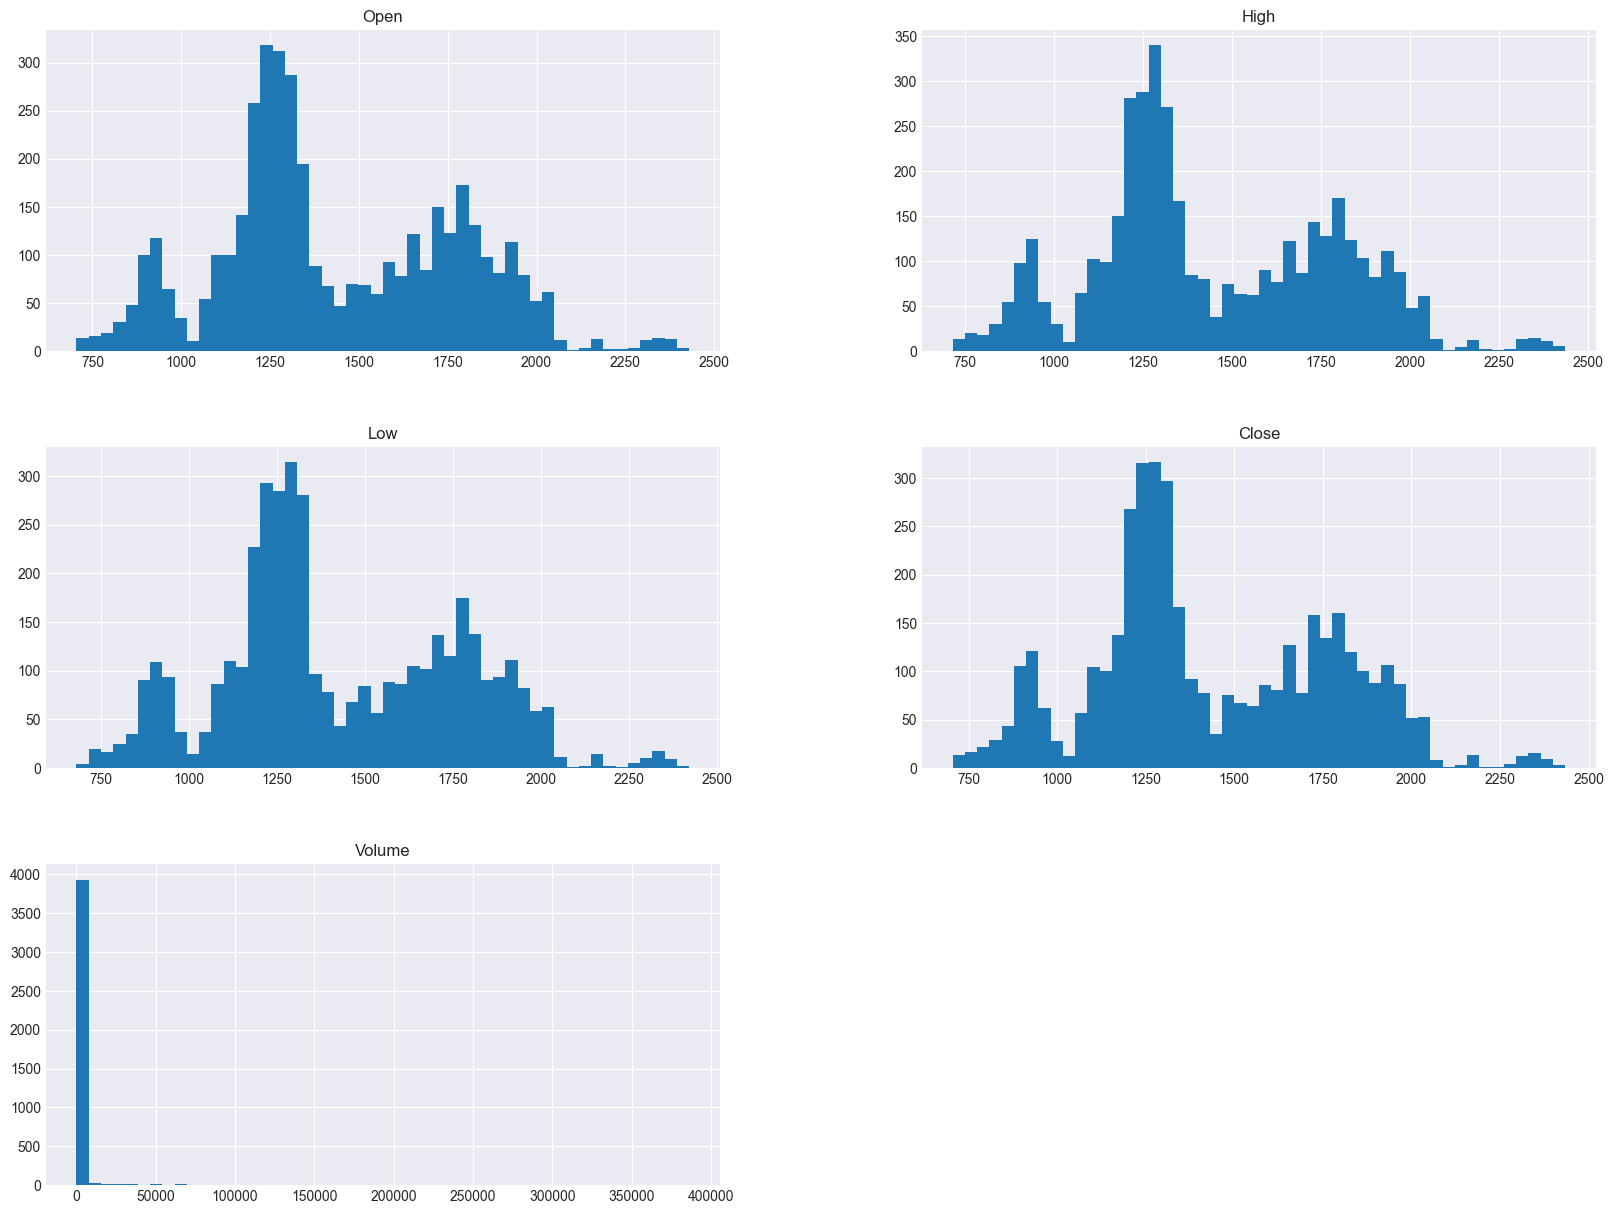

In [3]:
# Crear histogramas para todas las columnas numéricas del DataFrame
df_gold.hist(bins=50, figsize=(20, 15))

# Mostrar los gráficos
plt.show()

In [4]:
# Unicamente necesitamos la columna de cierre
df_gold = df_gold[['Close']]

# Borramos datos faltantes en caso de existir
df_gold = df_gold.dropna()

# Crear una columna de días para usar como variable independiente
df_gold['Days'] = np.arange(len(df_gold))

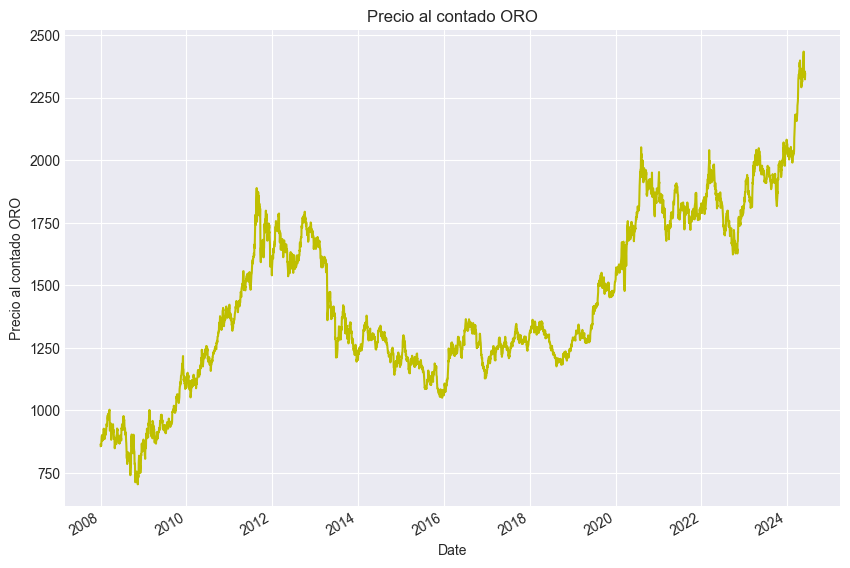

In [5]:
# Gráfica de los precios al cierre del oro
df_gold.Close.plot(figsize=(10, 7),color='y')
plt.ylabel("Precio al contado ORO")
plt.title("Precio al contado ORO")
plt.show()

In [6]:
# Definimos las variables explicativas
# Media movil de 3 dias
df_gold['S_3'] = df_gold['Close'].rolling(window=3).mean()
# Media movil de 9 dias
df_gold['S_9'] = df_gold['Close'].rolling(window=9).mean()
df_gold['next_day_price'] = df_gold['Close'].shift(-1)

df_gold = df_gold.dropna()
X = df_gold[['S_3', 'S_9']]

# Variable objetivo
y = df_gold['next_day_price']

In [7]:
# División del dataset en entrenamiento y prueba
t = .8 # Proporción 80/20
t = int(t*len(df_gold))

# Entrenamiento
X_train = X[:t]
y_train = y[:t]

# Prueba
X_test = X[t:]
y_test = y[t:]

In [8]:
# Implementación del modelo de regresión lineal.
linear = LinearRegression().fit(X_train, y_train)
print("Modelo de Regresión Lineal")
print("Precio del Oro al contado USD (y) = %.2f * 3 Media Móvil de 3 días (x1) \
+ %.2f * Media móvil de 9 días (x2) \
+ %.2f (constante)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Modelo de Regresión Lineal
Precio del Oro al contado USD (y) = 1.16 * 3 Media Móvil de 3 días (x1) + -0.16 * Media móvil de 9 días (x2) + 3.33 (constante)


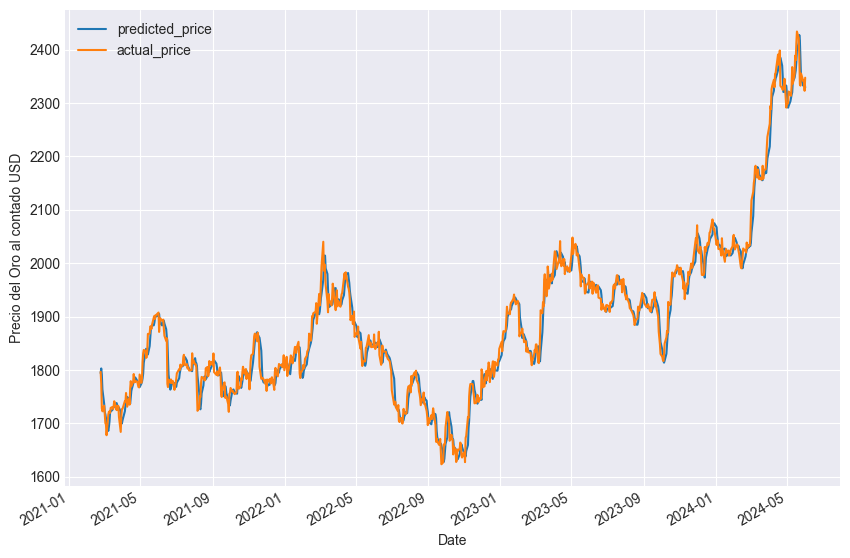

In [9]:
# Gráfico predictivo del precio del oro
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Precio del Oro al contado USD")
plt.show()

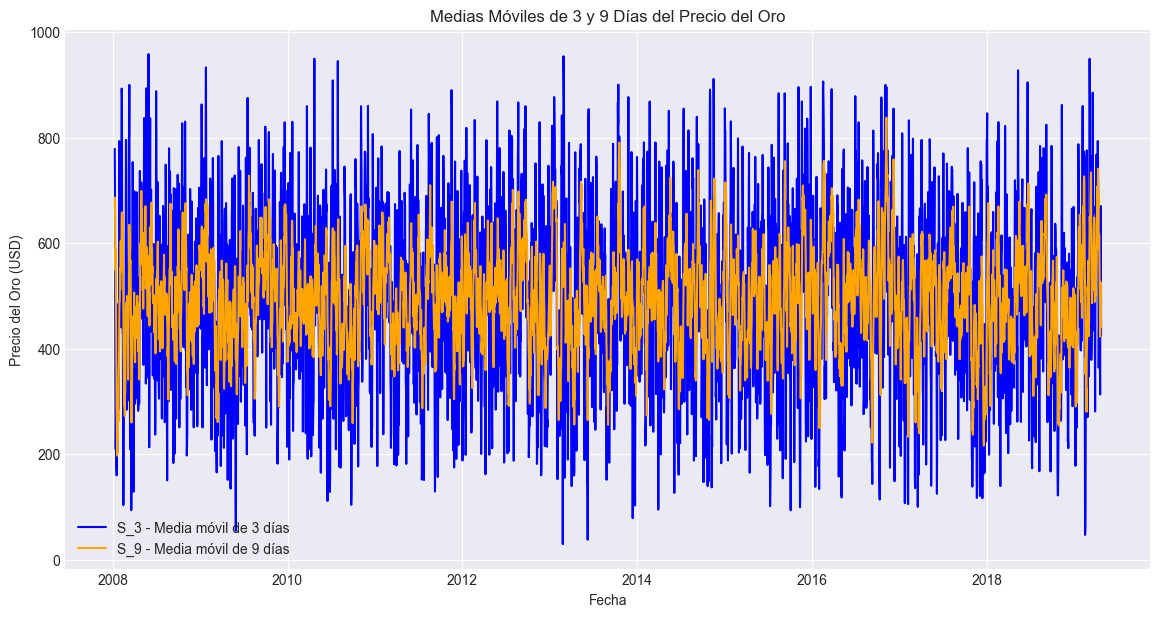

In [17]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
plt.figure(figsize=(14, 7))

# Graficar la media móvil de 3 días
plt.plot(df_gold.index, df_gold['S_3'], label='S_3 - Media móvil de 3 días', color='blue')

# Graficar la media móvil de 9 días
plt.plot(df_gold.index, df_gold['S_9'], label='S_9 - Media móvil de 9 días', color='orange')

# Agregar título y etiquetas
plt.title('Medias Móviles de 3 y 9 Días del Precio del Oro')
plt.xlabel('Fecha')
plt.ylabel('Precio del Oro (USD)')
plt.legend()

# Mostrar la gráfica
plt.show()


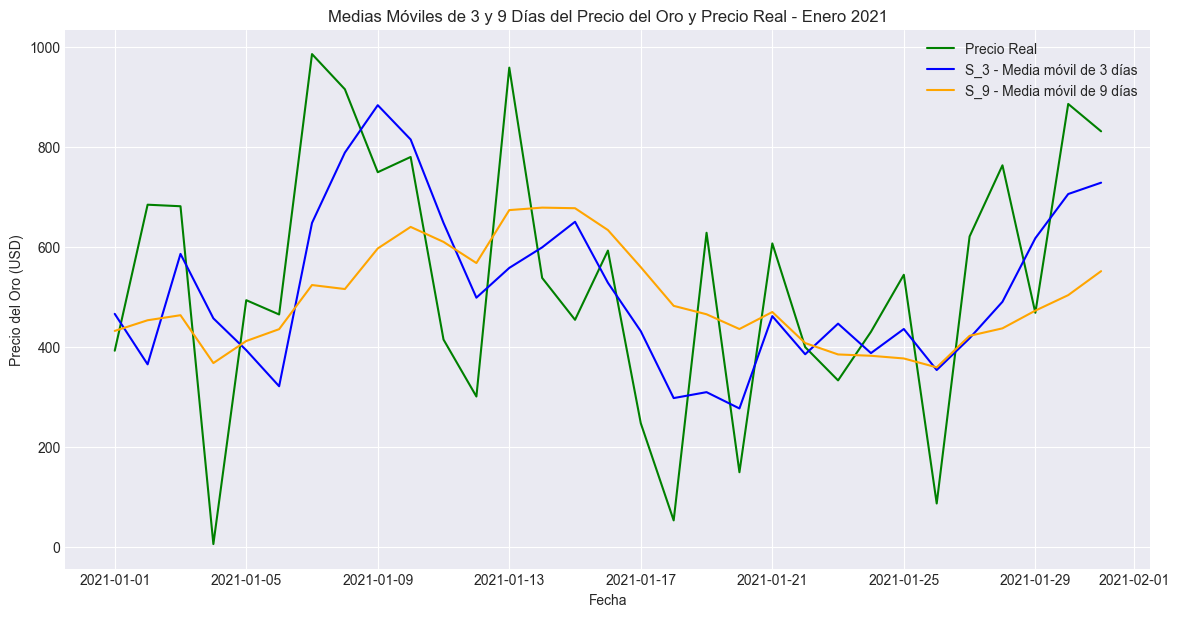

In [20]:
# Crear un conjunto de datos con fechas aseguradas
dates = pd.date_range(start="2020-12-01", end="2021-02-01", freq='D')
data = np.random.rand(len(dates), 4) * 1000  # Generar datos aleatorios
df_gold = pd.DataFrame(data, index=dates, columns=['Open', 'High', 'Low', 'Close'])

# Definir la columna de días
df_gold['Days'] = np.arange(len(df_gold))

# Calcular medias móviles
df_gold['S_3'] = df_gold['Close'].rolling(window=3).mean()
df_gold['S_9'] = df_gold['Close'].rolling(window=9).mean()
df_gold['next_day_price'] = df_gold['Close'].shift(-1)

# Eliminar valores nulos
df_gold = df_gold.dropna()

# Filtrar el dataframe para el mes de enero de 2021
df_january_2021 = df_gold.loc['2021-01-01':'2021-01-31']

# Graficar las medias móviles junto con el precio real para enero de 2021
plt.figure(figsize=(14, 7))
plt.plot(df_january_2021.index, df_january_2021['Close'], label='Precio Real', color='green')
plt.plot(df_january_2021.index, df_january_2021['S_3'], label='S_3 - Media móvil de 3 días', color='blue')
plt.plot(df_january_2021.index, df_january_2021['S_9'], label='S_9 - Media móvil de 9 días', color='orange')
plt.title('Medias Móviles de 3 y 9 Días del Precio del Oro y Precio Real - Enero 2021')
plt.xlabel('Fecha')
plt.ylabel('Precio del Oro (USD)')
plt.legend()
plt.show()

In [14]:
df_january_2021

,Open,High,Low,Close,Days,S_3,S_9,next_day_price


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular R² Score
r2_score = linear.score(X_test, y_test) * 100
print("R² Score: {:.2f}%".format(r2_score))

# Calcular MSE
mse = mean_squared_error(y_test, linear.predict(X_test))
print("Mean Squared Error (MSE): {:.2f}".format(mse))

# Calcular RMSE
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

# Calcular MAE
mae = mean_absolute_error(y_test, linear.predict(X_test))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))

# Calcular MAPE
mape = np.mean(np.abs((y_test - linear.predict(X_test)) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

R² Score: 98.33%
Mean Squared Error (MSE): 402.53
Root Mean Squared Error (RMSE): 20.06
Mean Absolute Error (MAE): 15.23
Mean Absolute Percentage Error (MAPE): 0.81%
